In [1]:
!pip install dask[complete] --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
from dask import delayed
import dask.dataframe as dd
from dask.distributed import Client, progress

In [3]:
client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:38319 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [4]:
@delayed
def sum(x, y):
    return x + y

@delayed
def sum_and_squared(x, y):
    return (x+y)**2

result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1,result2)
# lazy eval
result

Delayed('sum_and_squared-f721c80b-df29-4977-8e1d-1c640d940a13')

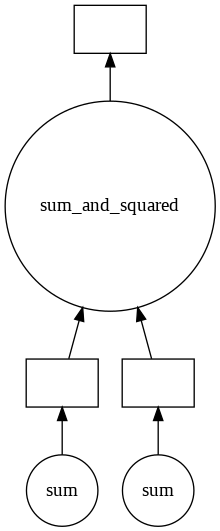

In [5]:
result.visualize()

In [6]:
# eager eval
result.compute()

196

## Parallelize the following code using Dask's @delayed decorator and derive the task execution graph.

In [7]:
@delayed
def sum_up(l): #takes a list of numbers as input
    return sum(l)

@delayed
def cube(n):
    return n**3

total = []
for i in range(1,10):
    total.append(cube(i))

summed_total = sum_up(total)
summed_total

Delayed('sum_up-75ec1939-1edb-4254-b05d-f59940b3042c')

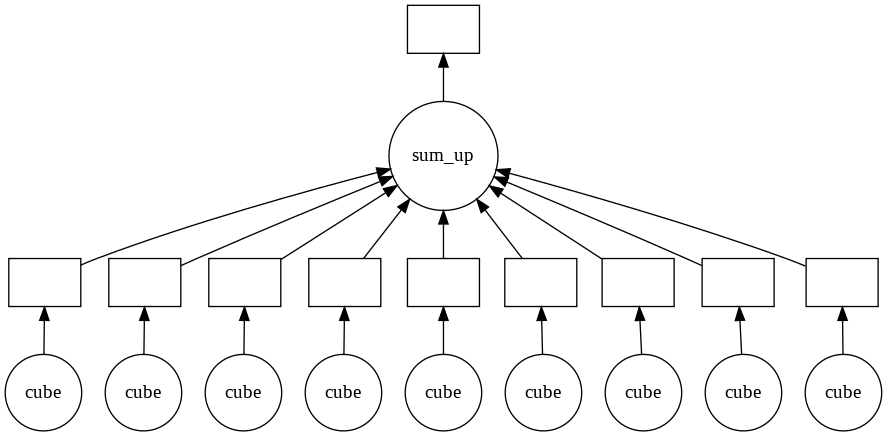

In [8]:
summed_total.visualize()

In [9]:
summed_total.compute()

Delayed('sum-4baf976f-caa6-4c21-94da-6de799542c3b')

## Parallelize the following code using Dask's @delayed decorator and derive the task execution graph.

In [10]:
# first two fibonacci numbers
fibonacci_nums = [1,1]

# returns the nth fibonacci number
@delayed
def get_nth_fibonacci_number(n):
    if n == 1:
        return fibonacci_nums[0]
    elif n == 2:
        return fibonacci_nums[1]
    else:
        return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

fib = get_nth_fibonacci_number(10)
fib

Delayed('get_nth_fibonacci_number-6dc70b81-2bdd-4f9f-a0ee-ebbaf1bb3bbe')

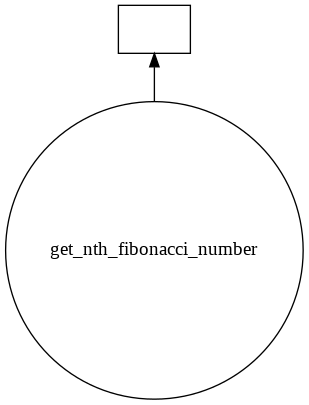

In [11]:
fib.visualize()

In [12]:
fib.compute()

Delayed('add-504c6140964d4204b4cae32aa9ec9b7a')